<a href="https://colab.research.google.com/github/harshrew19/FORE/blob/main/simpleNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 21st October, 2022
# fashion_mnist dataset
# https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [1]:
# 1.0
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
# 2.1 Read FASHION-MNIST data

path = "/gdrive/MyDrive/BDA DLNLP/"


In [6]:
# 2.2
data = pd.read_csv(path + "fashion_mnist_train.csv")

In [7]:
# 2.2.1
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# 2.2.2
data.shape

(60000, 785)

In [9]:
# 2.3 Pop out target
y = data.pop('label')

In [10]:
# 2.3.1
data.shape

(60000, 784)

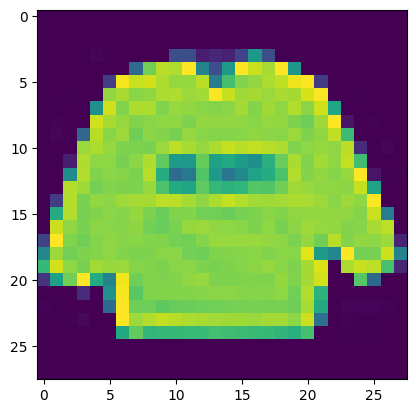

In [11]:
# 3.0
plt.imshow(data.iloc[0,:].values.reshape(28,28));

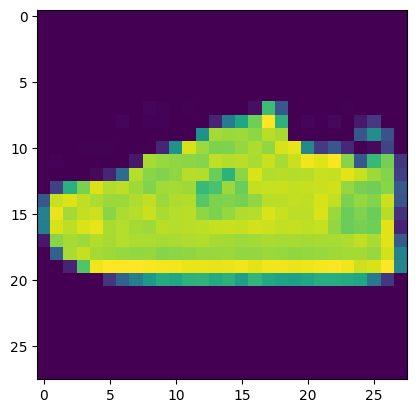

In [16]:
plt.imshow(data.iloc[59999,:].values.reshape(28,28));

In [23]:
y.nunique()
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
from sklearn.model_selection import train_test_split

In [29]:
X_Train,X_Test,y_Train,y_Test = train_test_split(data,y,test_size=0.25)

In [31]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [32]:
X_Train.shape
X_Test.shape
y_Train.shape
y_Test.shape

(45000, 784)

(15000, 784)

(45000,)

(15000,)

In [ ]:
# 3.1
data[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X_Train[:2]
X_Test[:2]
y_Train[:2]
y_Test[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
13641,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
22497,0,0,0,0,0,0,0,0,2,2,...,11,0,0,0,0,0,0,0,0,0
5961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


13641    0
53596    9
Name: label, dtype: int64

22497    6
5961     7
Name: label, dtype: int64

In [34]:
# 4.0
ss = StandardScaler()
ss.fit(X_Train)
X_Train = ss.transform(X_Train)
X_Test = ss.transform(X_Test)

StandardScaler()

In [35]:
X_Train[:2]
X_Test[:2]
y_Train[:2]
y_Test[:2]

array([[-0.00762792, -0.02472041, -0.02706961, ..., -0.15878692,
        -0.09194907, -0.03229101],
       [-0.00762792, -0.02472041, -0.02706961, ..., -0.15878692,
        -0.09194907, -0.03229101]])

array([[-0.00762792, -0.02472041, -0.02706961, ..., -0.15878692,
        -0.09194907, -0.03229101],
       [-0.00762792, -0.02472041, -0.02706961, ..., -0.15878692,
        -0.09194907, -0.03229101]])

13641    0
53596    9
Name: label, dtype: int64

22497    6
5961     7
Name: label, dtype: int64

In [ ]:
# 4.1
df.shape

(60000, 784)

In [ ]:
# 4.2
np.round(df[:10],1)

array([[-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       ...,
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ]])

## Model

In [41]:
# 5.0
model = tf.keras.Sequential()

In [38]:
X_Train.shape[1]

784

In [42]:
# 5.1
model.add( tf.keras.layers.Input(shape = X_Train.shape[1] ))

In [43]:
# 5.2
model.add(tf.keras.layers.Dense(512, activation = 'relu'))

In [44]:
# 5.3
model.add(tf.keras.layers.Dense(1024, activation = 'relu'))

In [45]:
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [46]:
# 5.4 Model summary:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 937,482
Trainable params: 937,482
Non-trainable params: 0
_________________________________________________________________


In [47]:
# 5.5 Compile model
model.compile(
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ["accuracy"]
              )

In [ ]:
# 6.0
model.fit(X_Train,y_Train, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 [==============================] - 26s 18ms/step - loss: 0.5158 - accuracy: 0.8222
Epoch 2/100
1407/1407 [==============================] - 26s 19ms/step - loss: 0.4224 - accuracy: 0.8595
Epoch 3/100
1407/1407 [==============================] - 27s 19ms/step - loss: 0.4037 - accuracy: 0.8706
Epoch 4/100
1407/1407 [==============================] - 26s 19ms/step - loss: 0.3904 - accuracy: 0.8802
Epoch 5/100
1407/1407 [==============================] - 25s 18ms/step - loss: 0.3894 - accuracy: 0.8852
Epoch 6/100
1407/1407 [==============================] - 27s 19ms/step - loss: 0.3786 - accuracy: 0.8899
Epoch 7/100
1407/1407 [==============================] - 27s 19ms/step - loss: 0.3843 - accuracy: 0.8940
Epoch 8/100
1407/1407 [==============================] - 27s 19ms/step - loss: 0.3789 - accuracy: 0.8996
Epoch 9/100
1407/1407 [==============================] - 25s 18ms/step - loss: 0.3693 - accuracy: 0.9019
Epoch 10/100
1407/1407 [==============================] - 27s 19ms/

In [ ]:
# 6.1
model.evaluate(df,y)

1875/1875 [==============================] - 2s 939us/step - loss: 0.2720 - accuracy: 0.9168


[0.2719540297985077, 0.9168333411216736]

In [ ]:
######################### I am done #################